------
------
# SISTEMAS DE CONTROL II - FCEFyN - 2025
## Alumno: Ferraris Domingo
----
----

## Control En Variables De Estado
-----

### Resultados

#### Item 1: Estudio Del Sistema, Respuesta Deseada Y Punto De Trabajo
Utilizando las **caracteristicas/requerimientos asignados para el ejercicio** se calcularon los parametros asi como el **punto de funcionamiento** de la respuesta deseada:  
> zp    = 0.8751 + 0.1446i (r = 0.8869, f = 9.3808°)  
> * psita = 0.5912  
> * wn    = 2.2555  
> * wd    = 1.8192  

Ademas se verificaron **38 muestras por ciclo**, mas que suficiente para trabajar con el sistema:
> m = 38.3764

#### Item 2: Diseños mediante sisotool
Utilizando sisotool se diseñaron controladores **PD y en ADELANTO** mediante lugar de raices  
En todos los diseños **se logro cumplir con los requerimientos** propuestos:

> Control PD
> * Mp ~ 10%  
> * tss ~ 2.4s  
> * ess = 0  

> Control ADELANTO1
> * Mp ~ 10%  
> * tss ~ 2.6s  
> * ess = 0

> Control ADELANTO2
> * Mp ~ 10%  
> * tss ~ 2.5s  
> * ess = 0

#### Item 3: Simulacion en Simulink
Se eligio como mejor dinamica a la obtenida por el controlador ADELANTO1 y **se simulo el sistema en simulink**

----


### Detalles

#### Item 1:  Pendulo, Asignacion De Variables, Linearizacion
La idea seguida fue tomar las ecuaciones y asignar variables de estado mediante asignacion de fase, luego definir el punto de equilibrio deseado y linealizar entorno a ese punto  

Para comenzar se tomo la ecuacion del pendulo y se asignaron las variables de estado mediante la asignacion de fase, para luego poder dibujar el espacio fasico facilmente  
Y tambien se definieron al torque como entrada u1 y al angulo theta como y1: 

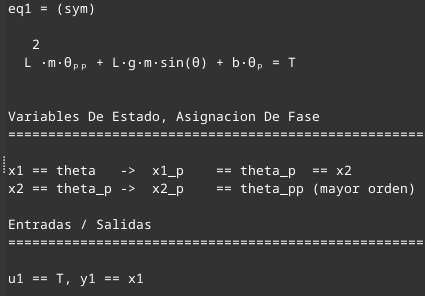

Reemplazando variables, entradas, salidas y reordenando se obtuvo el modelo dinamico del sistema:

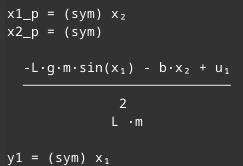

El objetivo es estabilizar el sistema en x1 = delta, para esto se diseñara un controlador  
Pero ademas como el sistema es no-lineal, se debe linealizar entorno a algun punto de operacion  
Como el diseño del controlador se basa en el sistema linealizado, se elige como punto de operacion el equilibrio deseado x1 = delta  
Cuando el sistema alcanza ese equilibrio, hace falta un torque u1 = ue para mantenerlo en el equilibrio deseado  
Aplicando la condicion de equilibrio al modelo dinamico:



Entonces el punto de operacion para linealizar:
> #### Equilibrio:
> * **[x1, x2, u1] == [delta, 0, m g L sin(delta)]**
> ##### .

Mediante octave se obtuvo el modelo linealizado y luego las matrices del sistema:

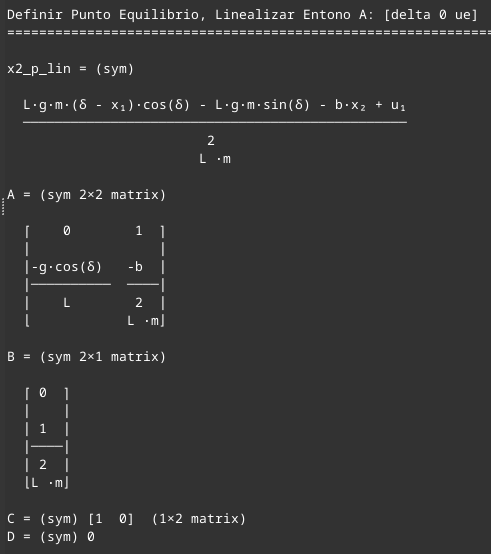

----

#### Item 2: Sistema Lineal, Estabilidad, Controlabilidad
Con los parametros asignados se calcularon las matrices A,B,C y D del modelo:

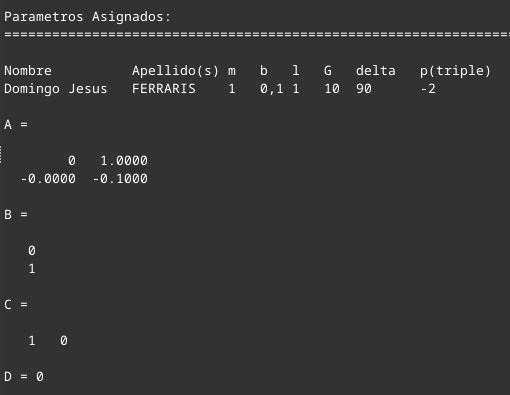

Luego se comprobo estabilidad con los autovalores de la matriz A y controlabilidad:

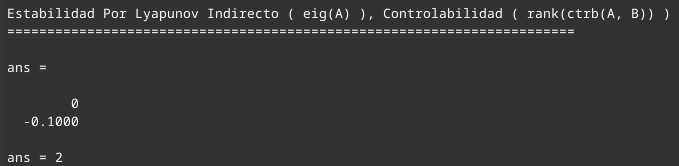

Como un autovalor es cero no se pudo asegurar nada en cuanto a estabilidad, pero el sistema es controlable

----

#### Item 3: Diseño De Controladores
Para la accion de control se utilizo un controlador con realimentacion de estados y accion integral, por lo tanto se calculo el sistema ampliado y comprobo estabilidad y controlabilidad:

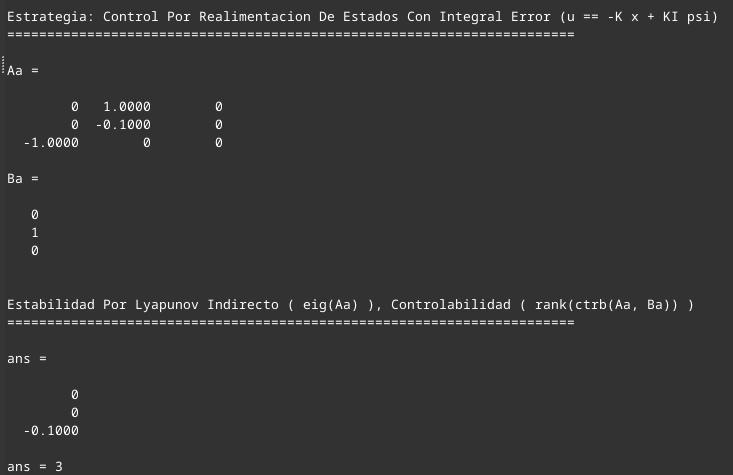

Dos autovalores nulos por tanto......., y el sistema ampliado es controlable

#### Por Asignacion De Polos
Siguiendo la consigna se calculo el controlador por asignacion de polos, con el comando acker de Octave posicionando un polo triple el -2  
Luego se simulo el sistema partiendo de theta = 0 para observar la respuesta y espacio de fase:

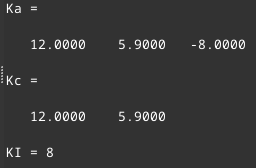

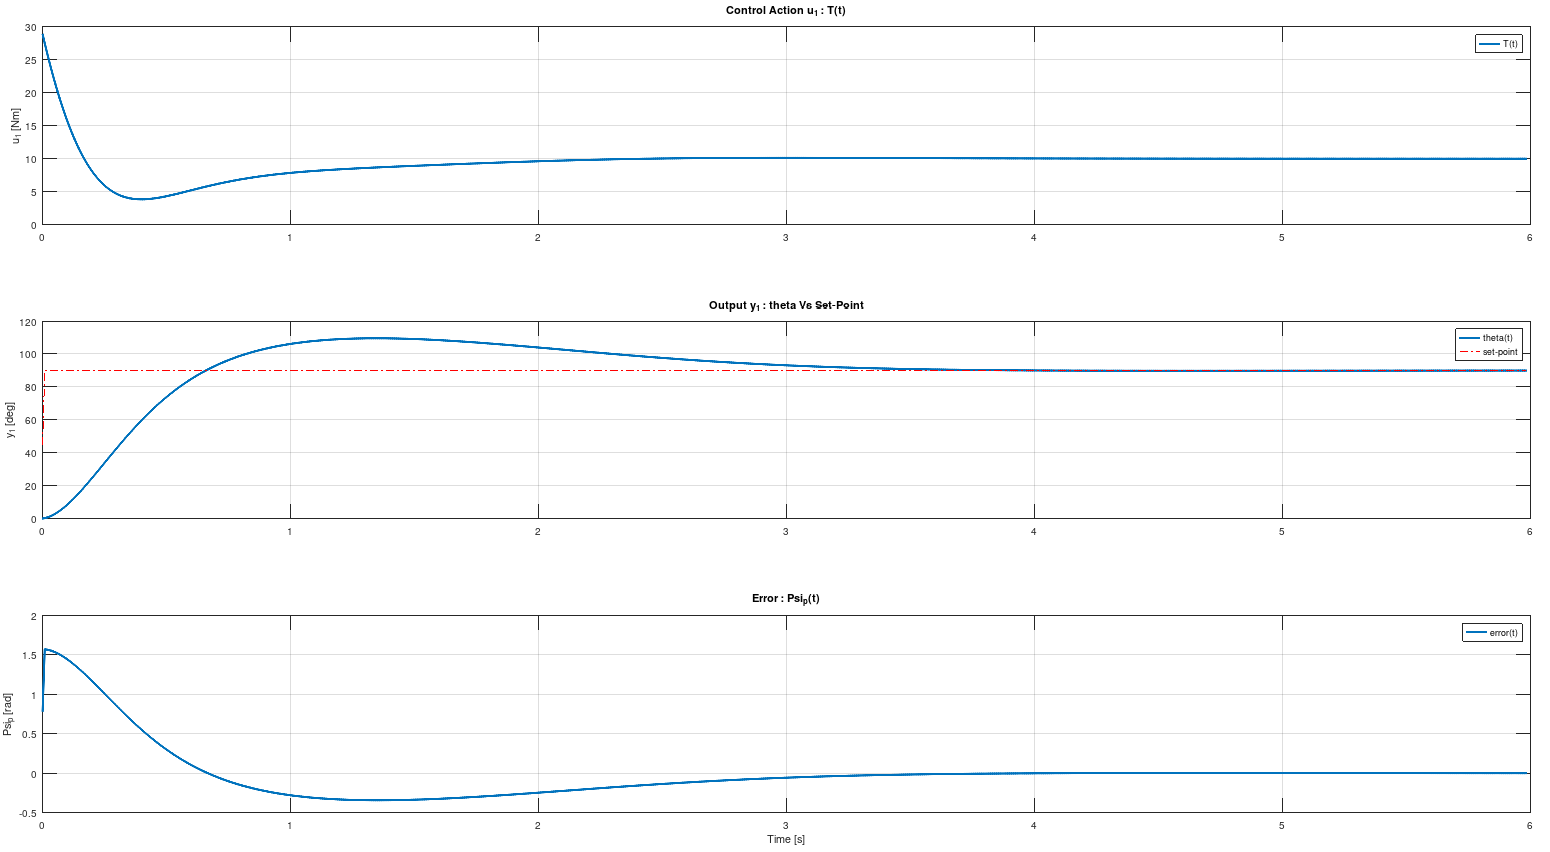

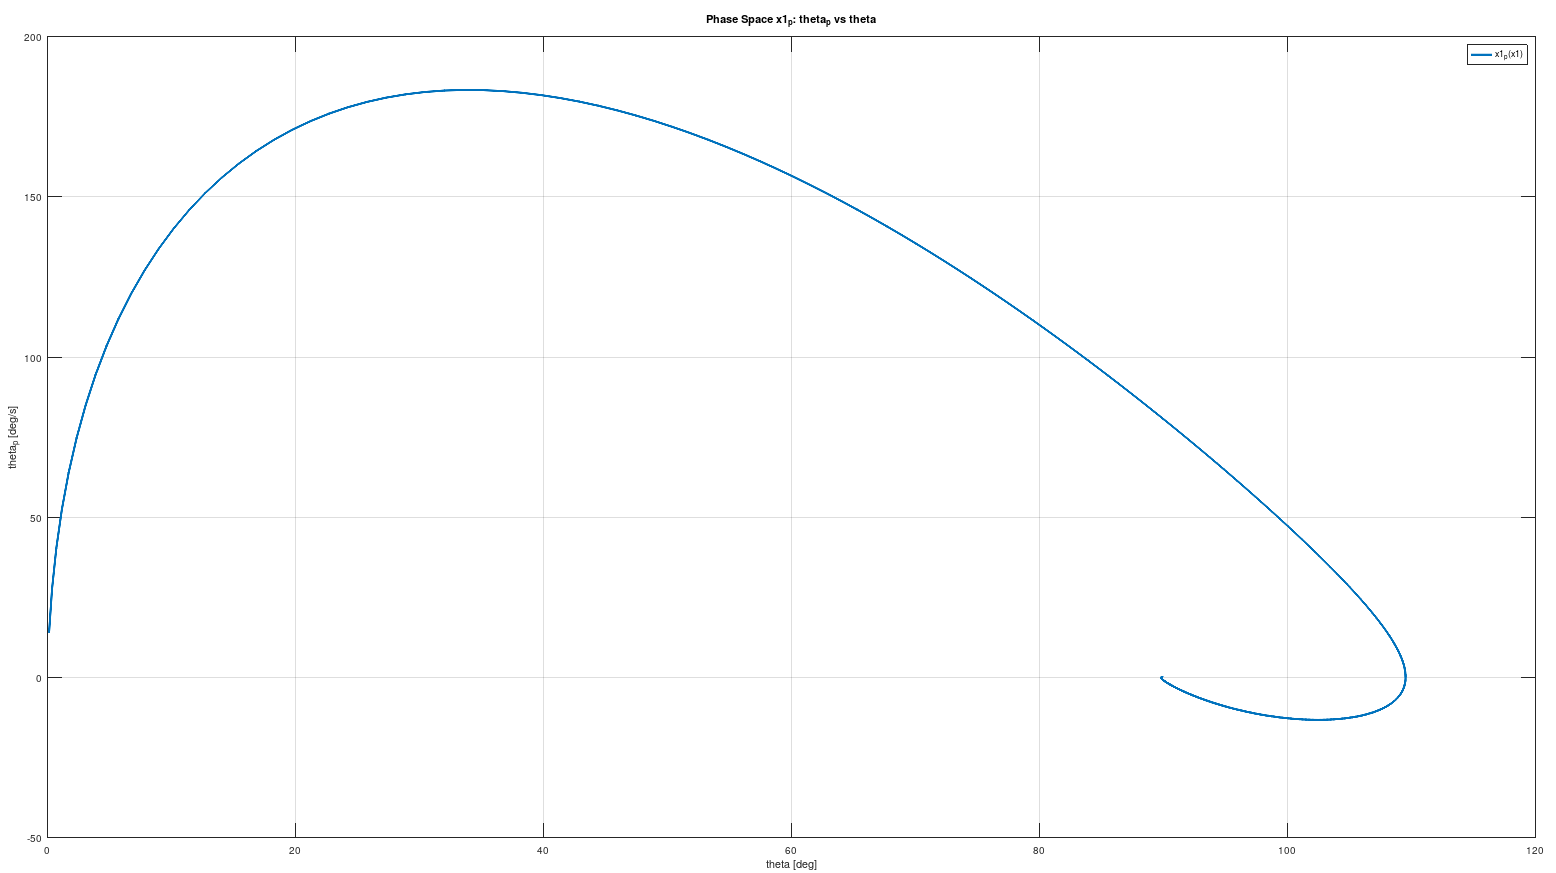

Se tomaron notas de algunos valores de interes de las respuestas para comparacion:
> * **tss ~ 3.2s**
> * **theta_max ~ 100 grados**
> * **u1_max ~ 30Nm**

#### Por LQR
Adicionalmente se diseñaron otros controladores por LQR ajustados con distintos valores de Q y R, trantando de mejorar las respuestas obtenidas siempre que fuera posible:

***LQR1: Penalizar fuertemente desviaciones de theta, penalizar poco accion de control***  

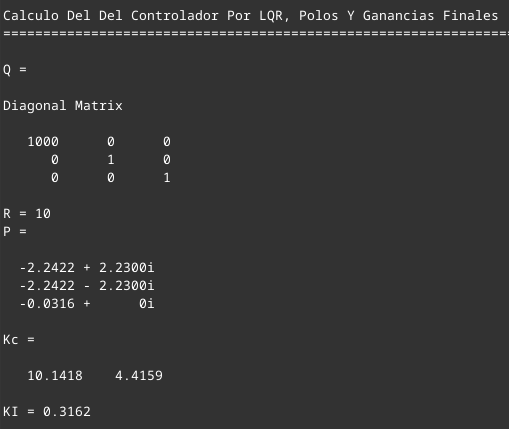

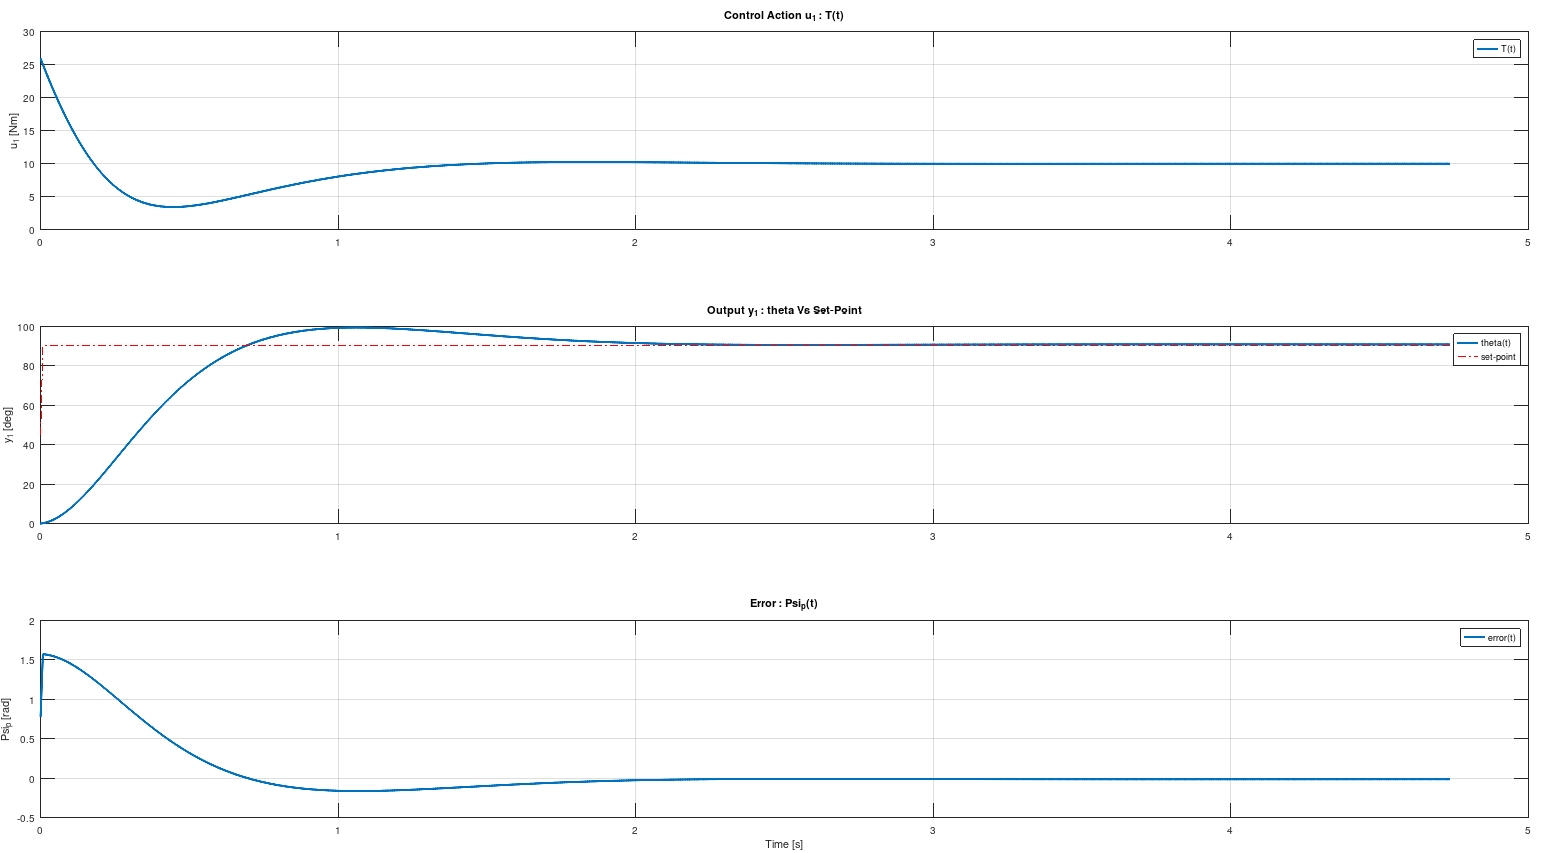

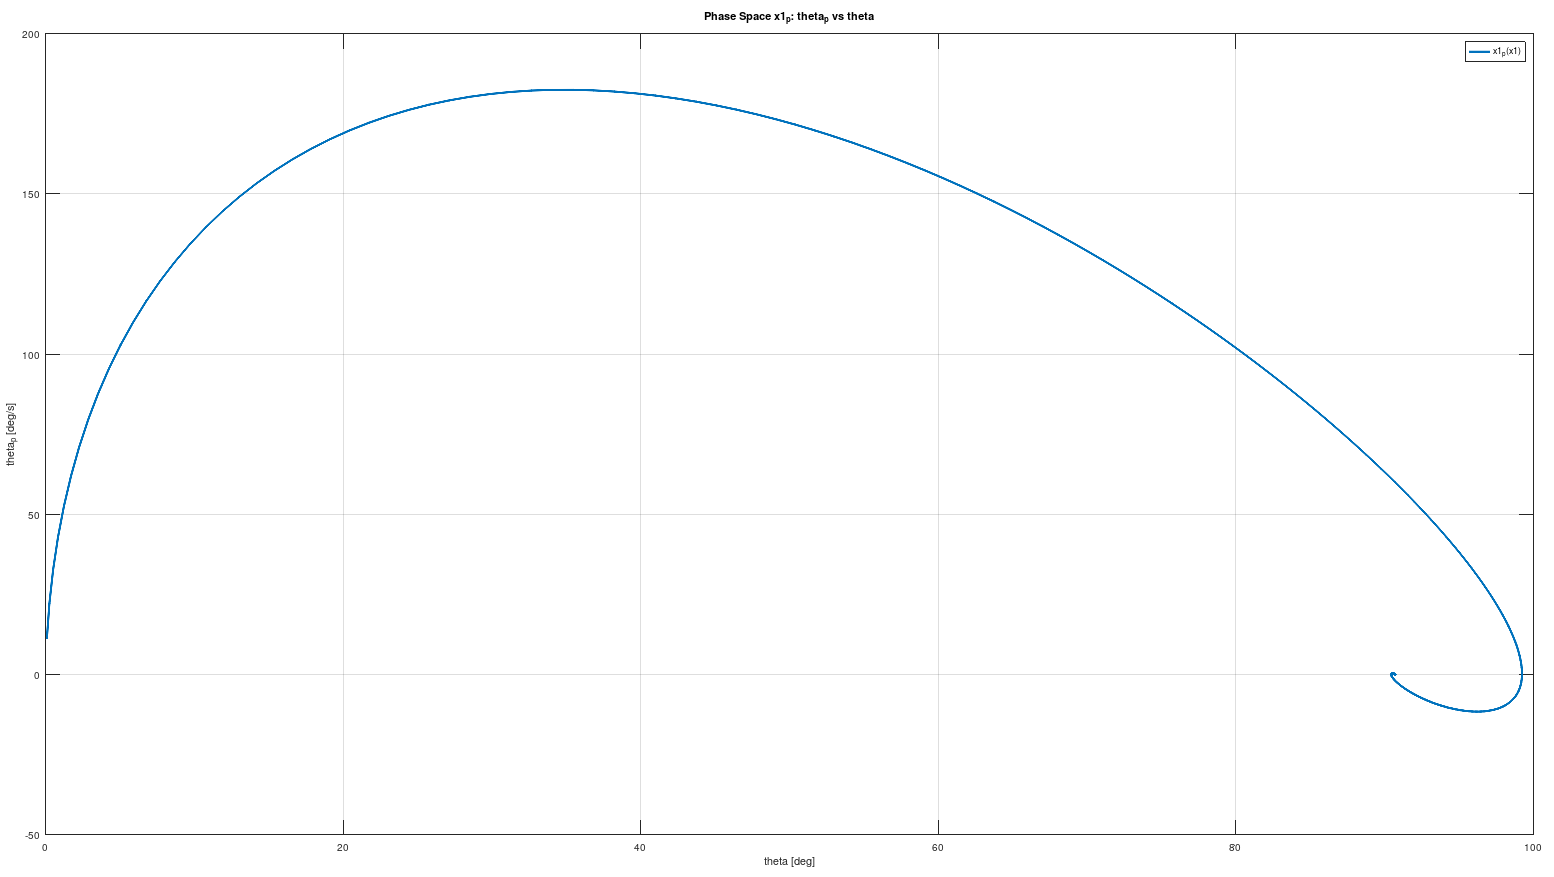

Para este controlador se obtienen tss ~ 1.9s, theta_max ~ 100 grados y u1_max ~ 26Nm, mejorando con respecto a la respuesta obtenida por asignacion de polos

***LQR2: Penalizar fuertemente desviaciones de theta, penalizar poco accion de control***  

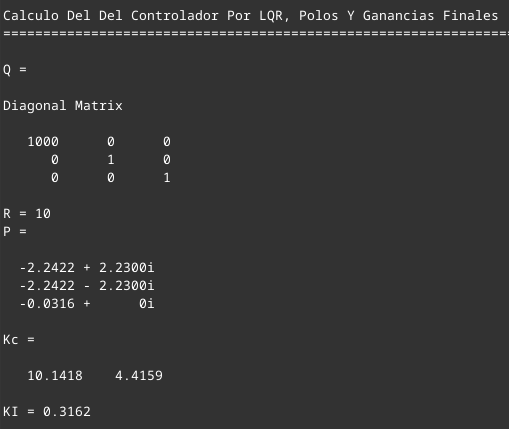

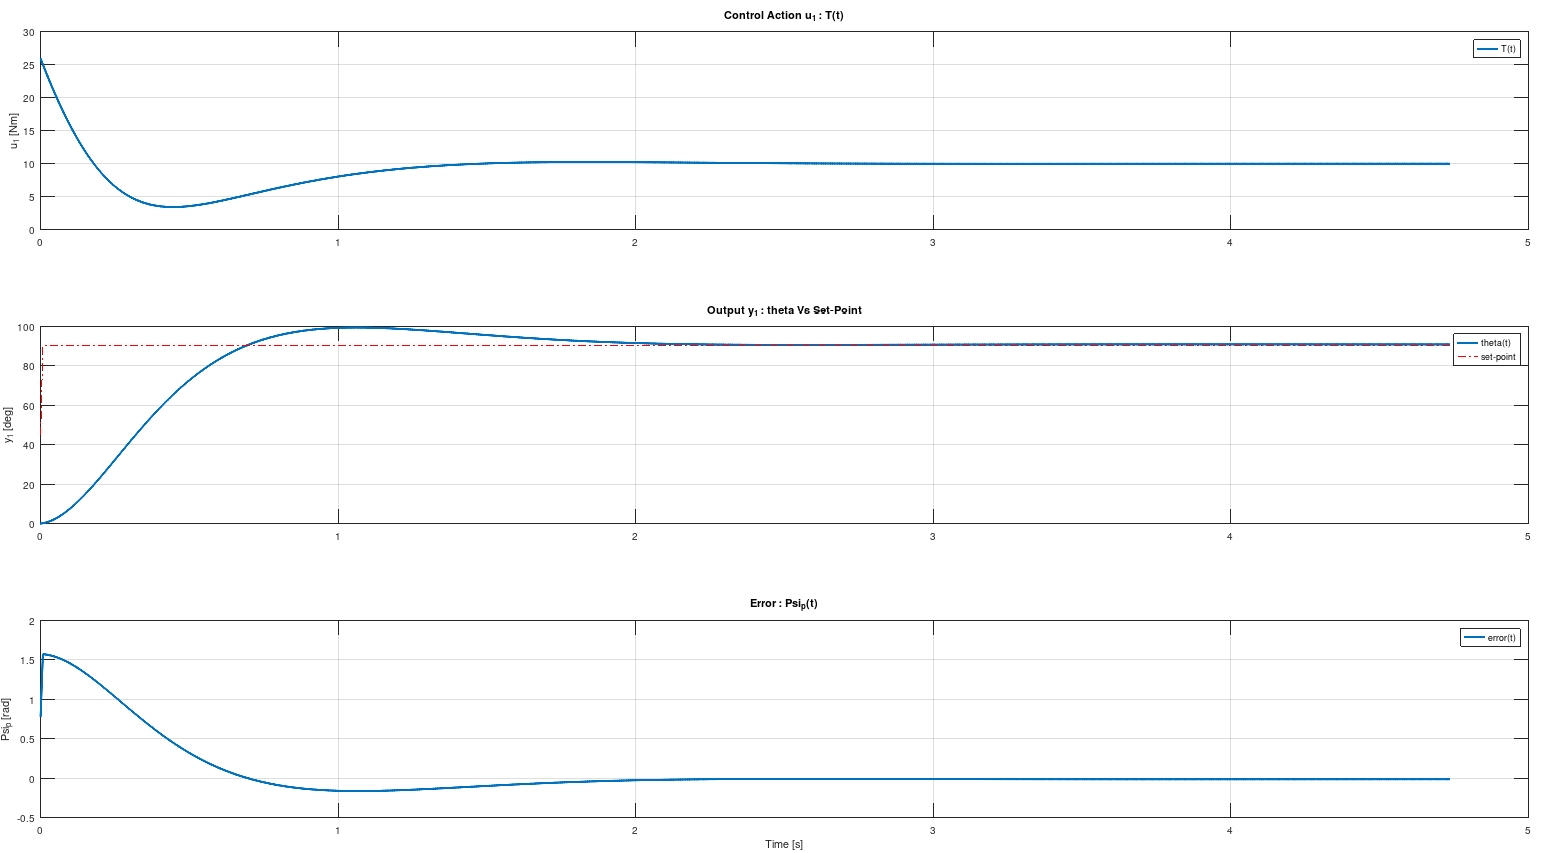

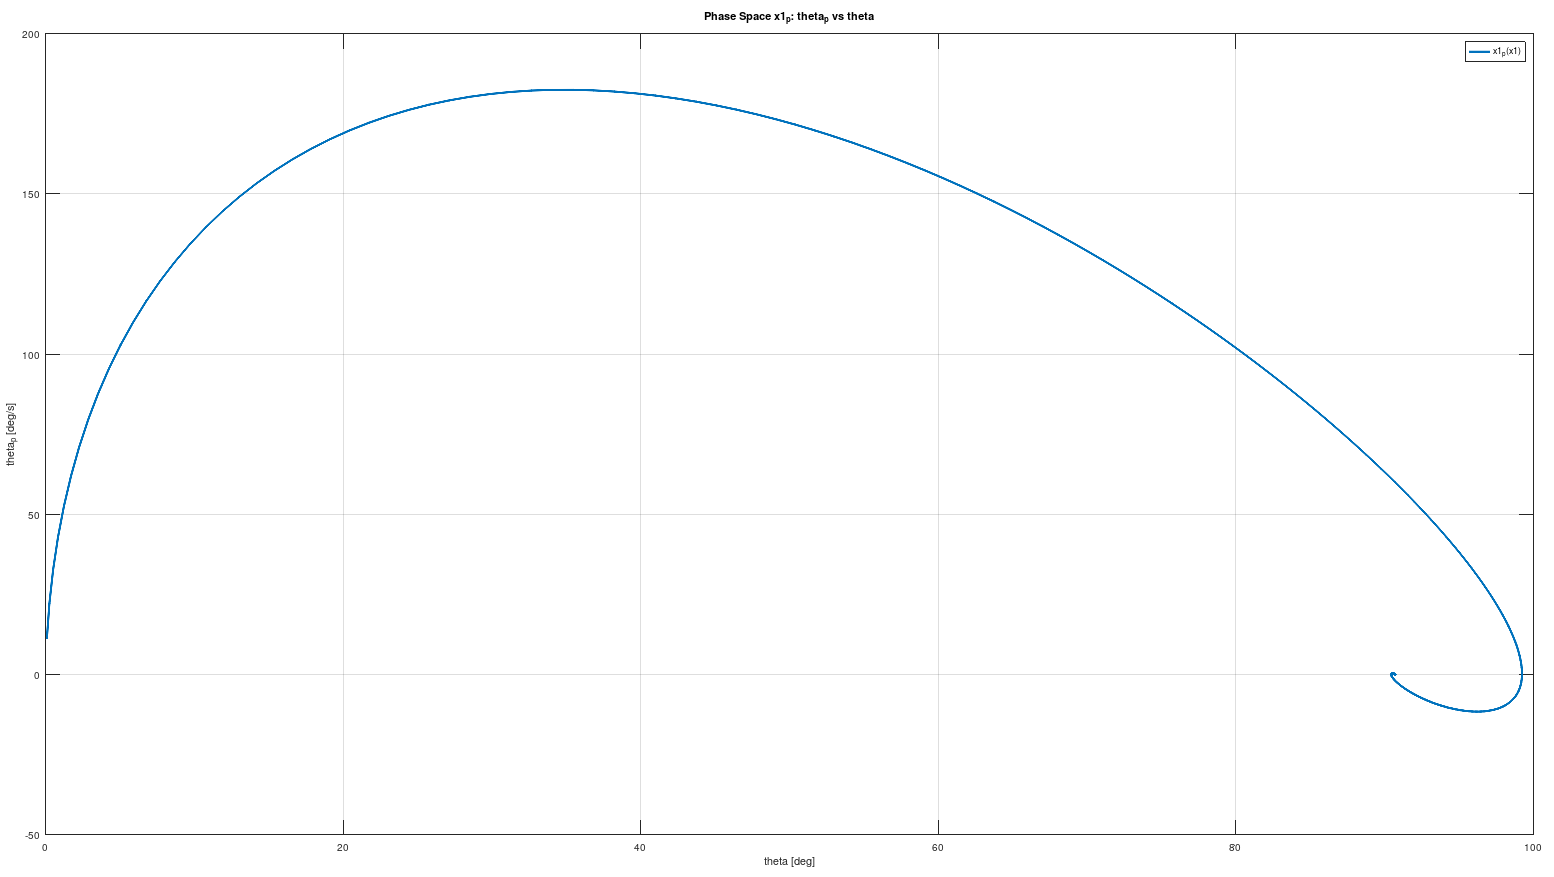

Para este controlador se obtienen tss ~ 1.9s, theta_max ~ 100 grados y u1_max ~ 26Nm, mejorando con respecto a la respuesta obtenida por asignacion de polos

----

#### Item 4: Robustez

----


----------

## Fuentes/herramientas
1. Apuntes/Videos De La Materia
2. Matlab, Simulink, Chat-GPT, vscode

## GitHub
1. https://github.com/Clifferto/carrerpath/tree/control2/nationalUniversity/2025/controlSystems2  

----------